### Plot Matrices
To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

Seaborn's PairGrid class facilitates the creation of this kind of plot matrix.

In [ ]:
g = sb.PairGrid(data = df, vars = ['num_var1', 'num_var2', 'num_var3'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

By default, PairGrid only expects to depict numeric variables; a typical invocation of PairGrid plots the same variables on the horizontal and vertical axes. On the diagonals, where the row and column variables match, a histogram is plotted. Off the diagonals, a scatterplot between the two variables is created.

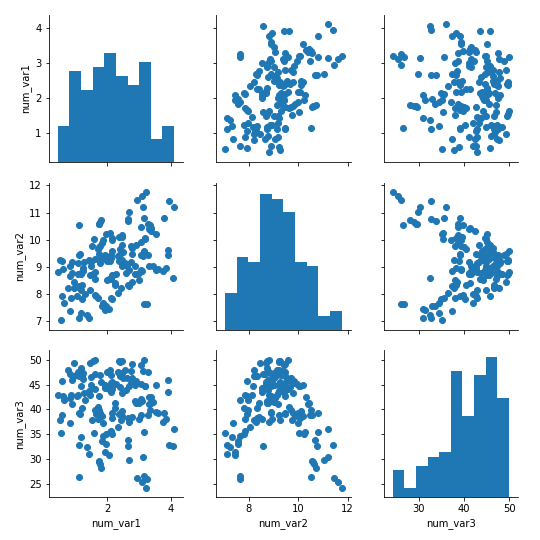

The pairplot function can also be used to render this common use case in a single call.

For other relationships, the flexibility of PairGrid shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

In [ ]:
g = sb.PairGrid(data = df, x_vars = ['num_var1', 'num_var2', 'num_var3'],
                y_vars = ['cat_var1','cat_var2'])
g.map(sb.violinplot, inner = 'quartile')

When you choose to create a plot matrix, be aware that the time it takes to render the plot depends on the number of data points you have and the number of variables you want to plot. Increasing the number of variables increases the number of plots that need to be rendered in a quadratic fashion. In addition, increasing the number of variables means that the individual subplot size needs to be reduced in order to fit the matrix width on your screen. That means that, if you have a lot of data, it might be difficult to see the relationships between variables due to overplotting, and it will take a long time to complete. One recommended approach is to take a random subset of the data to plot in the plot matrix instead. Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.

#### Correlation Matrices
For numeric variables, it can be useful to create a correlation matrix as part of your exploration. While it's true that the Panda's .corr function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a heat map to make it easier to see the strength of the relationships.

In [ ]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

Instead of using the default sequential color map, a diverging color map is specified and its center is set to 0. That way, we can use hue to tell if a correlation is positive or negative, and see its strength from the hue's intensity.

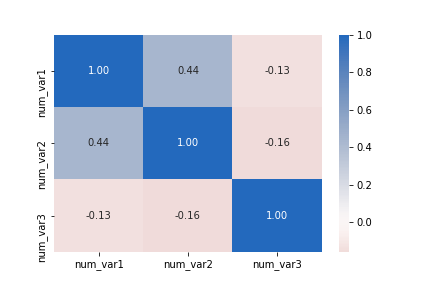

Don't forget that correlations are computed based on strength of linear relationship. Compare the correlation between "num_var2" and "num_var3" to the corresponding cell in the first plot matrix as an example of how a correlation statistic might be misleading.